# USED CAR PRICE PREDICTION

## importing essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as lec
import joblib

## Loading Datasets

In [2]:
train_df = pd.read_csv('DataSets\\train.csv')

In [3]:
train_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [4]:
train_df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [5]:
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [6]:
kmkg = 0
kmpl = 0
for i in train_df['Mileage']:
    if str(i).endswith("km/kg"):
        kmkg = kmkg+1
    elif str(i).endswith("kmpl"):
        kmpl = kmpl+1

print('The number of rows with Km/Kg : ', kmkg)
print('The number of rows with Kmpl : ', kmpl)

The number of rows with Km/Kg :  65
The number of rows with Kmpl :  5952


In [7]:
CC = 0
for i in train_df['Engine']:
    if str(i).endswith("CC"):
        CC+=1
print('The number of rows with CC : ', CC)

The number of rows with CC :  5983


In [8]:
bhp = 0
for i in train_df['Power']:
    if str(i).endswith("bhp"):
        bhp+=1
print('The number of rows with bhp : {} '.format(bhp))

The number of rows with bhp : 5876 


In [9]:
train_df = train_df[train_df.Mileage.str.contains("kmpl", na = False)]
train_df = train_df[train_df.Power.str.contains("bhp", na = False)]
train_df = train_df[train_df.Engine.str.contains("CC", na = False)]

train_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [10]:
train_df['Mileage'] = train_df.Mileage.str.replace(" kmpl", "")
train_df['Power'] = train_df.Power.str.replace(" bhp", "")
train_df['Engine'] = train_df.Engine.str.replace(" CC", "")

In [11]:
train_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [12]:
train_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                2
Price                0
dtype: int64

In [13]:
train_df = train_df.dropna(subset = ['Seats'])
train_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
train_df['Mileage'] = train_df.Mileage.astype('float64')
train_df['Engine'] = train_df.Engine.astype('float64')
train_df['Power'] = train_df.Power.astype('float64')

C:\Users\krishna\AppData\Local\Temp\ipykernel_2944\3243927681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Mileage'] = train_df.Mileage.astype('float64')
C:\Users\krishna\AppData\Local\Temp\ipykernel_2944\3243927681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Engine'] = train_df.Engine.astype('float64')
C:\Users\krishna\AppData\Local\Temp\ipykernel_2944\3243927681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [15]:
train_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [16]:
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [17]:
le = lec()

In [18]:
train_df['Fuel_Type'] = le.fit_transform(train_df['Fuel_Type'])
train_df['Transmission'] = le.fit_transform(train_df['Transmission'])
train_df['Owner_Type'] = le.fit_transform(train_df['Owner_Type'])

C:\Users\krishna\AppData\Local\Temp\ipykernel_2944\1507016679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Fuel_Type'] = le.fit_transform(train_df['Fuel_Type'])
C:\Users\krishna\AppData\Local\Temp\ipykernel_2944\1507016679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Transmission'] = le.fit_transform(train_df['Transmission'])
C:\Users\krishna\AppData\Local\Temp\ipykernel_2944\1507016679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [19]:
train_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,2,1,0,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,2,1,0,18.90,998.0,67.10,5.0,2.65


In [20]:
train_df['Owner_Type'].unique()

array([0, 2, 1, 3])

In [21]:
train_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [22]:
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [23]:
train_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

# Data Visualization

C:\Users\krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


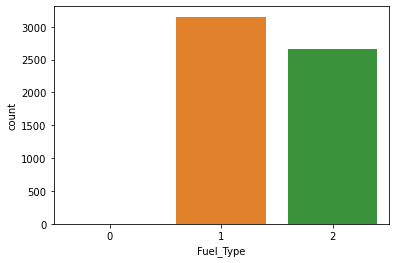

In [24]:
sns.countplot(train_df['Fuel_Type'])
plt.show()

In [35]:
count = 0
for i in train_df['Fuel_Type']:
    if(i==0):
        print(i)
        count += 1
count

0

In [36]:
train_df = train_df.drop(index = 0, axis = 0, inplace = True)
train_df

KeyError: '[0] not found in axis'

C:\Users\krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


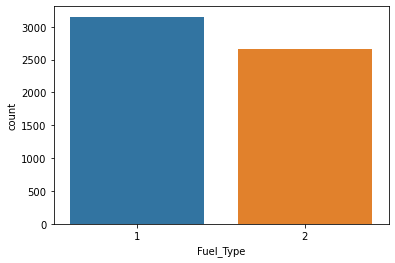

In [37]:
sns.countplot(train_df['Fuel_Type'])
plt.show()

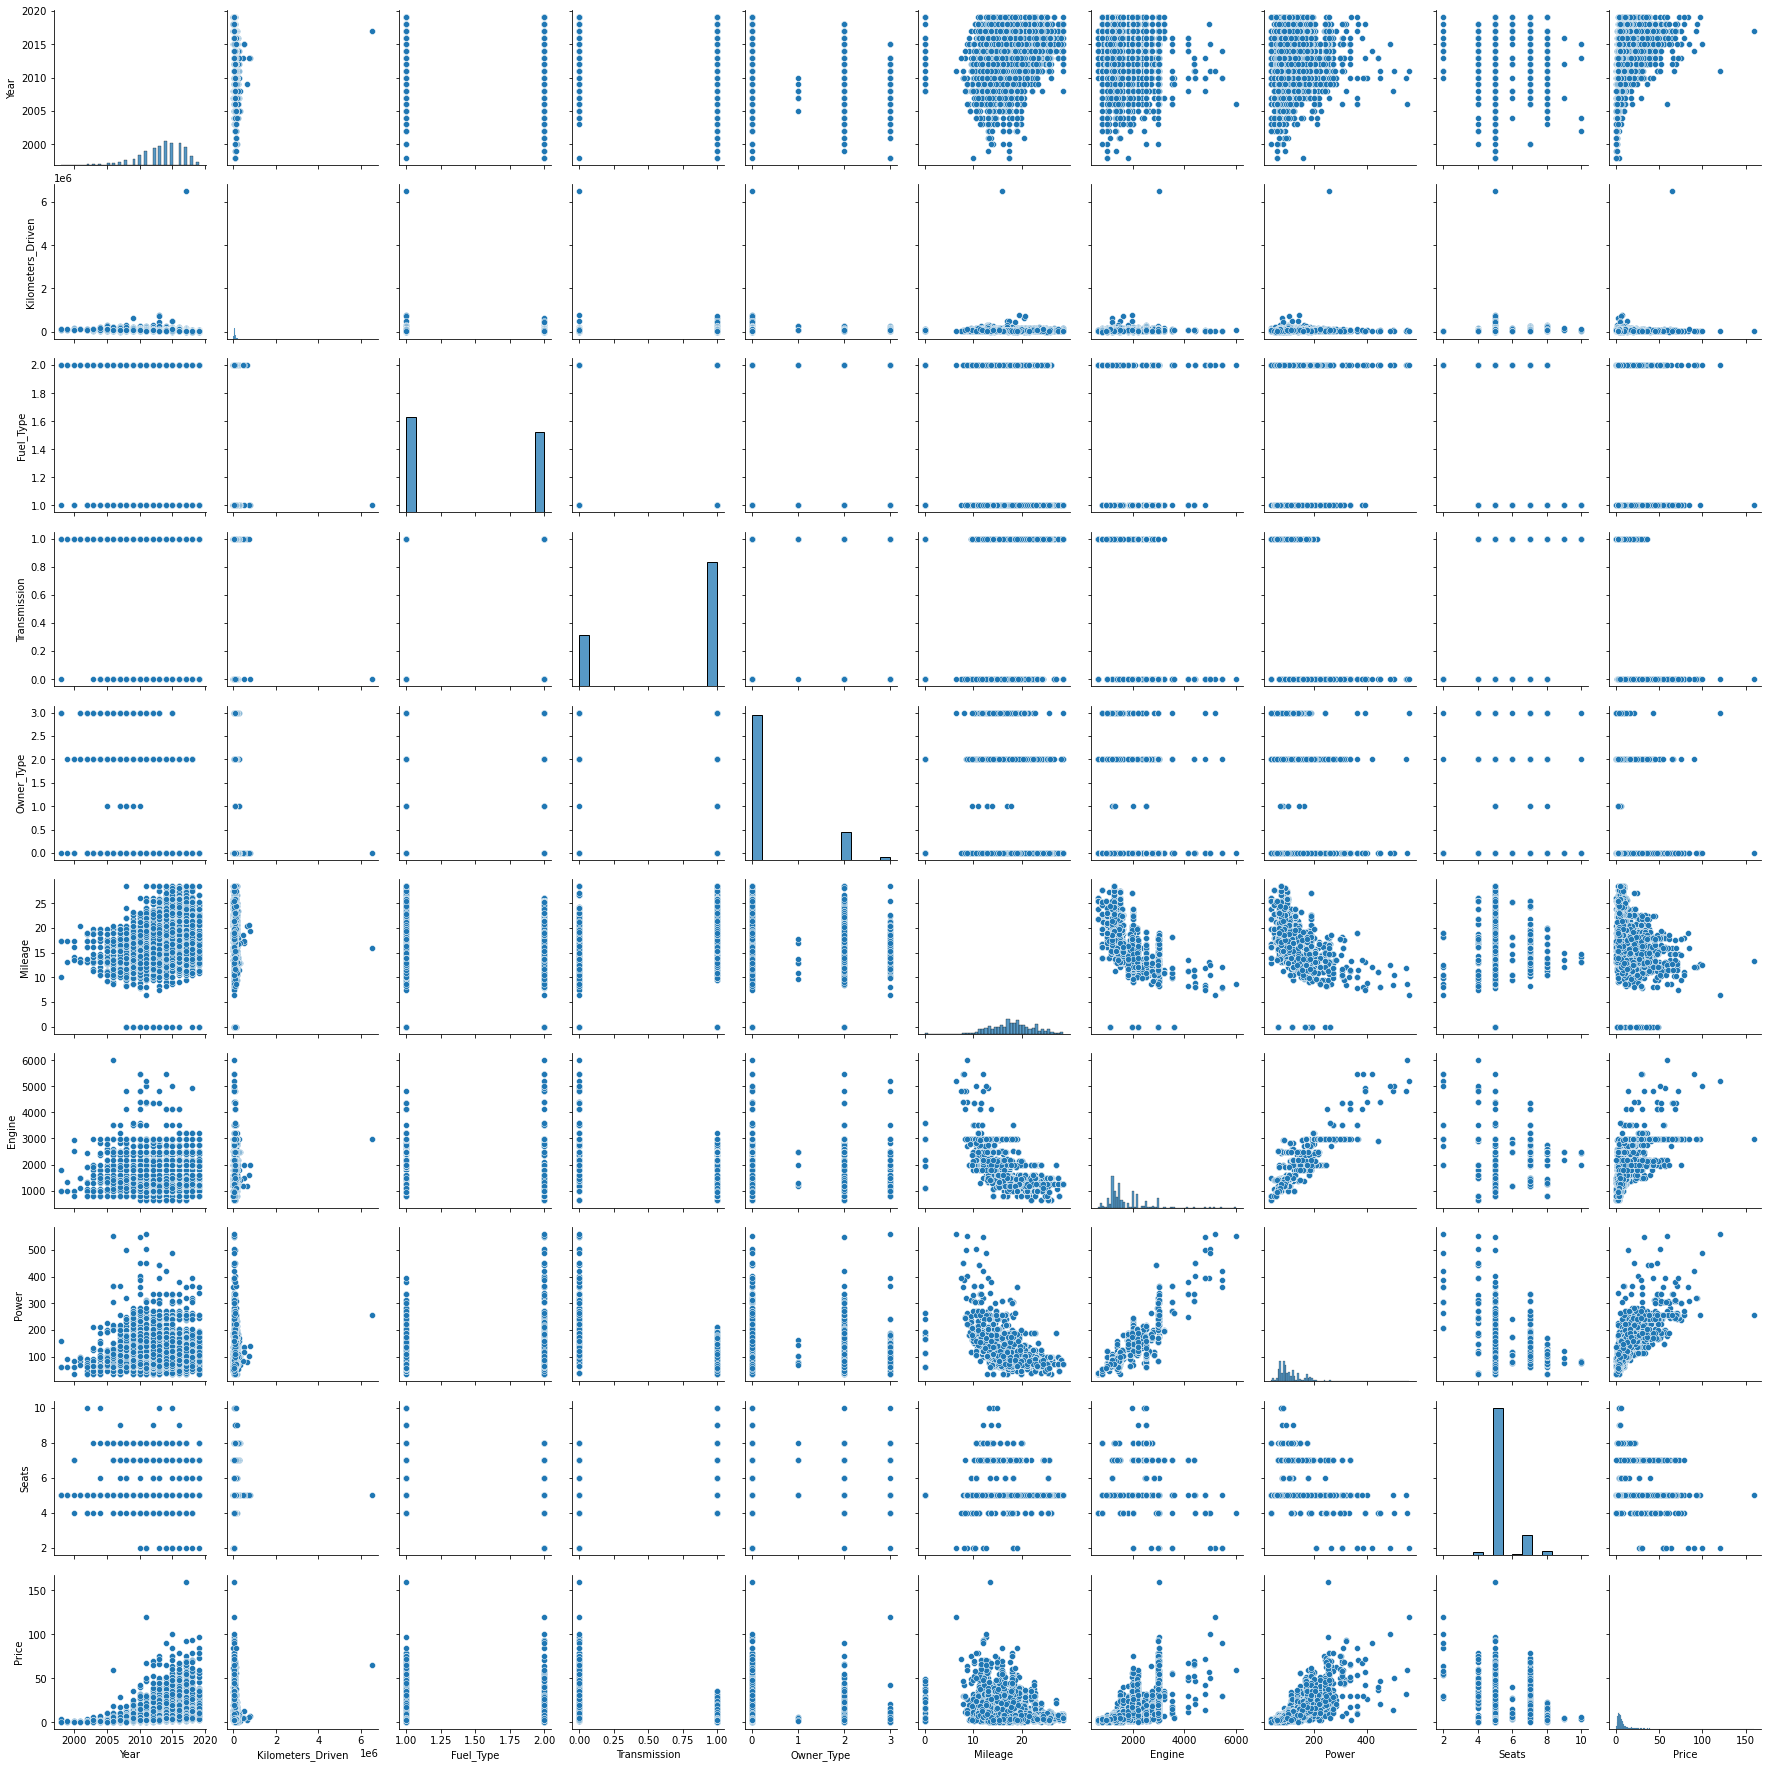

In [38]:
sns.pairplot(train_df)
plt.show()

In [39]:
X = train_df.drop(['Price', 'Name', 'Location'], axis = 1)
y = train_df['Price']

In [40]:
cor = X.corr()
cor

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
Year,1.000000,-0.169006,-0.111459,-0.086296,-0.378324,0.291055,-0.068260,0.015246,0.007828
Kilometers_Driven,-0.169006,1.000000,-0.107048,0.024397,0.076327,-0.061805,0.093220,0.033328,0.083300
Fuel_Type,-0.111459,-0.107048,1.000000,0.133027,0.040008,-0.118554,-0.424221,-0.284726,-0.308860
Transmission,-0.086296,0.024397,0.133027,1.000000,-0.002320,0.367300,-0.499214,-0.642933,0.077243
Owner_Type,-0.378324,0.076327,0.040008,-0.002320,1.000000,-0.146539,0.057775,0.029331,0.005271
Mileage,0.291055,-0.061805,-0.118554,0.367300,-0.146539,1.000000,-0.637239,-0.536726,-0.330502
Engine,-0.068260,0.093220,-0.424221,-0.499214,0.057775,-0.637239,1.000000,0.865013,0.400124
Power,0.015246,0.033328,-0.284726,-0.642933,0.029331,-0.536726,0.865013,1.000000,0.098152
Seats,0.007828,0.083300,-0.308860,0.077243,0.005271,-0.330502,0.400124,0.098152,1.000000


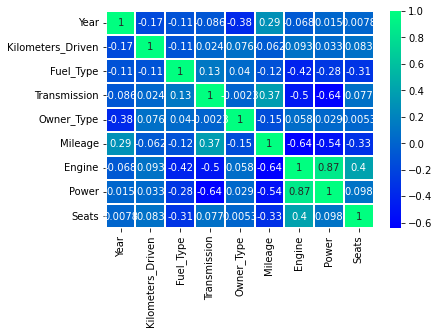

In [41]:
sns.heatmap(cor, annot = True, cmap = 'winter', linewidth = 0.3)
plt.show()

## Spliting out dataframe into train and test

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 51)

In [44]:
print("Size of X_train: ", X_train.shape)
print("Size of X_test: ", X_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of X_train:  (5226, 9)
Size of X_test:  (581, 9)
Size of y_train:  (5226,)
Size of y_test:  (581,)


### Feature Scaling of Data

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [52]:
X_train_sc

array([[-0.15593894,  0.371534  , -0.91765283, ..., -0.38592638,
        -0.84998119, -0.35943888],
       [ 0.47628518, -0.58152506, -0.91765283, ...,  0.8605172 ,
         0.41654523, -0.35943888],
       [ 0.47628518,  0.24041494, -0.91765283, ..., -0.85334272,
        -0.81273042, -0.35943888],
       ...,
       [ 0.16017312, -0.21431824, -0.91765283, ..., -0.07934147,
         0.23401643, -0.35943888],
       [ 1.10850929, -1.2765951 ,  1.08973674, ..., -0.72434251,
        -0.58922575, -0.35943888],
       [ 0.16017312, -0.18808918, -0.91765283, ..., -0.28205608,
        -0.09565295, -0.35943888]])

In [54]:
X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc

,0,1,2,3,4,5,6,7,8
0,-0.155939,0.371534,-0.917653,0.640129,-0.451516,0.420206,-0.385926,-0.849981,-0.359439
1,0.476285,-0.581525,-0.917653,-1.562185,-0.451516,-0.071636,0.860517,0.416545,-0.359439
2,0.476285,0.240415,-0.917653,0.640129,-0.451516,1.357049,-0.853343,-0.812730,-0.359439
3,-0.472051,-0.922503,-0.917653,-1.562185,-0.451516,-0.788320,0.860517,1.049808,-0.359439
4,0.476285,-0.056944,-0.917653,0.640129,-0.451516,1.052575,-0.220069,-0.443203,-0.359439
...,...,...,...,...,...,...,...,...,...
5221,1.108509,-0.063291,-0.917653,0.640129,-0.451516,2.387576,-0.638901,-0.742885,-0.359439
5222,-0.472051,-1.000403,1.089737,0.640129,-0.451516,-0.406557,-0.722667,-0.740091,-0.359439
5223,0.160173,-0.214318,-0.917653,-1.562185,-0.451516,0.005654,-0.079341,0.234016,-0.359439
5224,1.108509,-1.276595,1.089737,0.640129,2.037536,0.162575,-0.724343,-0.589226,-0.359439


## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3044703897555662

In [56]:
lr_sc = LinearRegression()
lr_sc.fit(X_train_sc, y_train)
lr_sc.score(X_test_sc, y_test)

0.6920887434958471

## SVM Regressor

In [57]:
from sklearn.svm import SVR

svr = SVR(kernel = 'poly')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-14134.127624892748

In [58]:
svr_sc = SVR(kernel = 'rbf')
svr_sc.fit(X_train_sc, y_train)
svr_sc.score(X_test_sc, y_test)

0.6785743585931292

## Random forest Regressor

In [73]:
# Creating Model using Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 50, criterion = 'mse')
rf_reg.fit(X_train, y_train)
acc = rf_reg.score(X_test, y_test)
print(acc*100)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


90.63481647269371


In [64]:
rf_reg2 = RandomForestRegressor(n_estimators = 50, criterion = 'absolute_error')
rf_reg2.fit(X_train, y_train)
rf_reg2.score(X_test, y_test)

0.8711847399601556

## Random forest regressor for feature scaled data

In [62]:
rf_reg_fs = RandomForestRegressor(n_estimators = 50, criterion = 'mse')
rf_reg_fs.fit(X_train_sc, y_train)
rf_reg_fs.score(X_test_sc, y_test)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.853729580147282

## DecisionTree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(criterion = 'mse')
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.7894476089190247

In [66]:
dt_reg_fs = DecisionTreeRegressor(criterion = 'mse')
dt_reg_fs.fit(X_train_sc, y_train)
dt_reg_fs.score(X_test_sc, y_test)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.7269652148998058

In [93]:
X_test.loc[1851].values

array([2.015e+03, 5.400e+04, 1.000e+00, 1.000e+00, 0.000e+00, 2.440e+01,
       1.120e+03, 7.100e+01, 5.000e+00])

In [94]:
y_test[1851]

3.7

### We will prefer Random Forest Regressor without using feature scaled data because it gives more accuracy (almost 90 %)

In [74]:
model = joblib.dump(rf_reg ,'ucpp_model')

In [75]:
pred = joblib.load('ucpp_model')

## Predicting Values Using our Test data

In [97]:
arr = X_test.loc[1851]
arr = np.array(arr)
arr = arr.reshape(1,-1)
arr
pred.predict(arr)

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.0836])